In [14]:
import pandas as pd

df = pd.read_excel("top5-players24-25.xlsx") 
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24.0,2000.0,3,1,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
1,2,Max Aarons,eng ENG,"DF,MF",Valencia,es La Liga,24.0,2000.0,4,1,...,0.0,0.0,0.0,0.0,0.0,0.00,0.02,0.02,0.00,0.02
2,3,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21.0,2003.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.10,0.00,0.10,0.10,0.10
3,4,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,20.0,2004.0,6,0,...,0.0,0.0,0.0,0.0,0.0,0.06,0.00,0.06,0.06,0.06
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18.0,2006.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00


In [15]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls_90', 'Ast_90', 'G+A_90', 'G-PK_90', 'G+A-PK_90', 'xG_90', 'xAG_90',
       'xG+xAG_90', 'npxG_90', 'npxG+xAG_90'],
      dtype='object')

In [16]:
df[['Gls', 'Ast', 'xG', 'npxG', 'xAG', 'npxG+xAG']].describe().T

,count,mean,std,min,25%,50%,75%,max
Gls,2854.0,1.683952,3.156227,0.0,0.0,0.0,2.0,31.0
Ast,2854.0,1.201472,1.946998,0.0,0.0,0.0,2.0,18.0
xG,2854.0,1.706447,2.817890,0.0,0.1,0.7,2.1,27.1
npxG,2854.0,1.563770,2.459233,0.0,0.1,0.7,2.0,24.0
xAG,2854.0,1.215522,1.686843,0.0,0.1,0.6,1.6,14.2
npxG+xAG,2854.0,2.781079,3.745280,0.0,0.2,1.4,3.8,32.4


## Attacking metrics histogram.

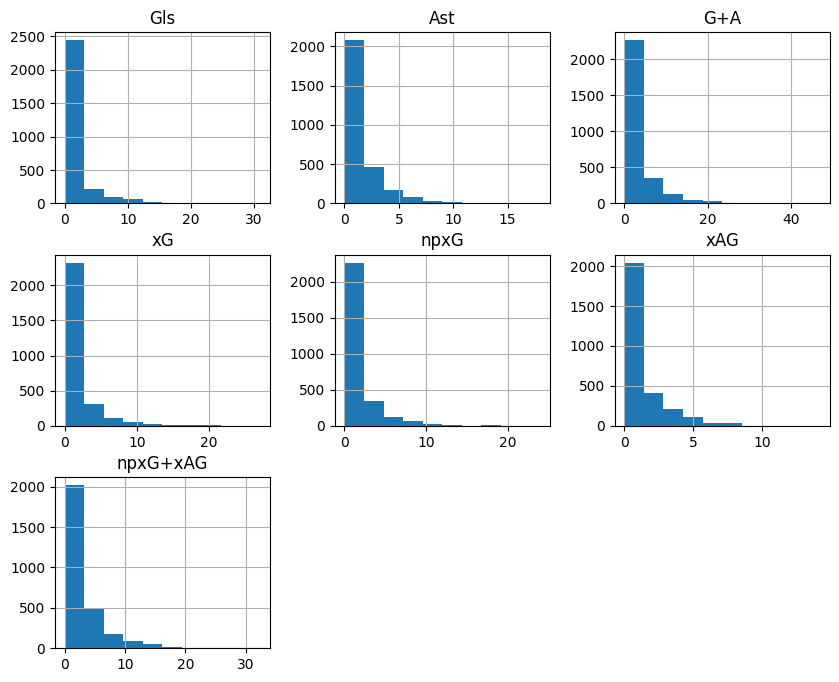

In [17]:
import matplotlib.pyplot as plt

df.hist(column=["Gls", "Ast", "G+A", "xG", "npxG", "xAG", "npxG+xAG"], figsize=(10, 8))
plt.show()

Very clear that only a few players are attacking in the whole game of football.

## Goals-Assists and xG-xAG per team [["Gls", "Ast", "xG", "xAG"]]

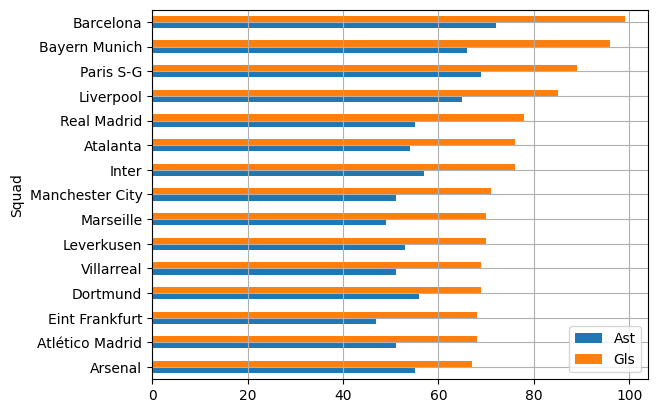

In [18]:
actual = df.groupby(by=["Squad"]).agg({
    "Gls": "sum",
    "Ast": "sum",
}).reset_index().sort_values(by="Gls", ascending=False)

top_15_actual = actual.iloc[: 15, : ][::-1]
top_15_actual.plot(kind="barh", x="Squad", y=["Ast", "Gls"], legend=True, grid=True)
plt.show()

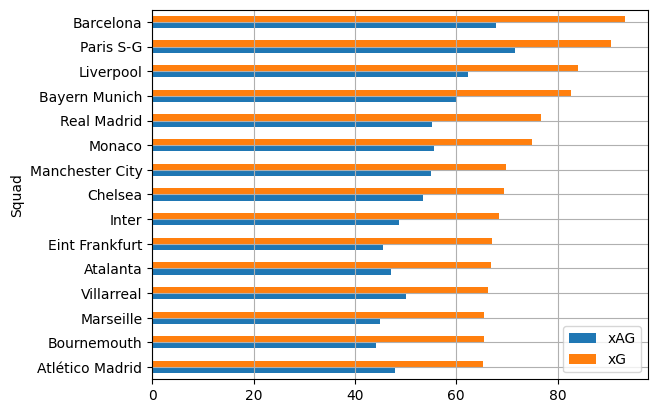

In [19]:
expected = df.groupby(by=["Squad"]).agg({
    "xG": "sum",
    "xAG": "sum",
}).reset_index().sort_values(by="xG", ascending=False)

top_15_expected = expected.iloc[: 15, : ][::-1]
top_15_expected.plot(kind="barh", x="Squad", y=["xAG", "xG"], legend=True, grid=True)
plt.show()

## Efficiency Score

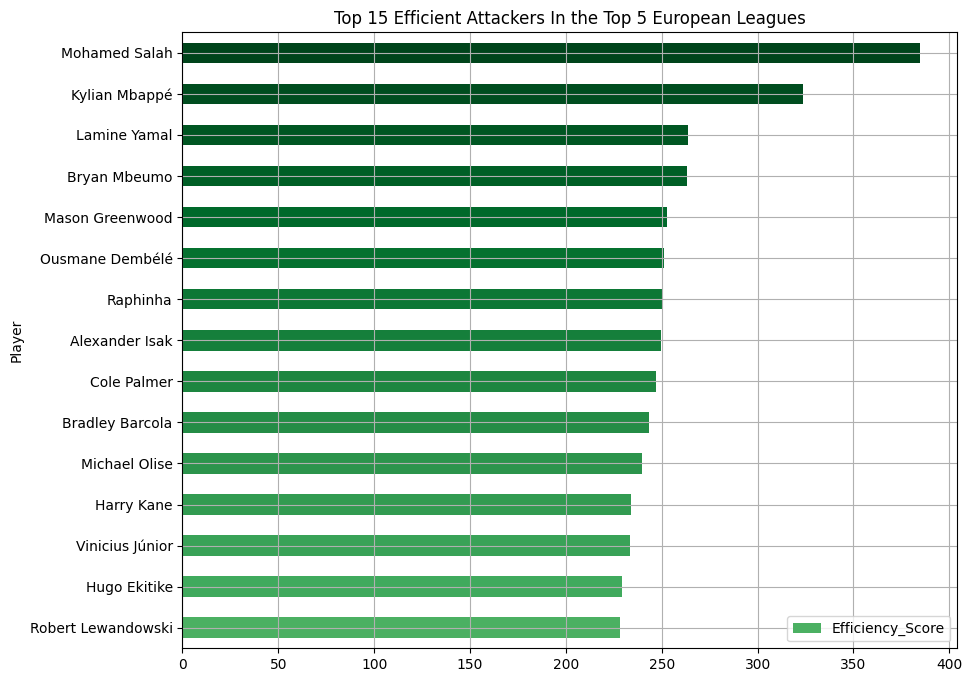

In [20]:
import matplotlib.cm as colormap
import numpy as np

# Set weights
goal_w = 2.0
assist_w = 1.4
xg_w = 0.8
xa_w = 0.6
full_nineties_w = 1.2
np_xg_w = 1.0
pr_gc_w = 0.6
ga_w = 2.5

df["Efficiency_Score"] = (
    goal_w * df["Gls"] +
    assist_w * df["Ast"] +
    xg_w * df["xG"] +
    xa_w * df["xAG"] +
    full_nineties_w * df["90s"] +
    np_xg_w * df["npxG"] +
    pr_gc_w * df["PrgC"] +
    ga_w * df["G+A"]    
)

top_15_efficent_players = df[["Player", "Efficiency_Score"]].sort_values(by="Efficiency_Score").tail(15)

colors = colormap.Greens(np.linspace(0.6, 1, len(top_15_efficent_players)))
top_15_efficent_players.plot(kind="barh", x="Player", y="Efficiency_Score", color=colors, figsize=(10, 8), grid=True)
plt.title("Top 15 Efficient Attackers In the Top 5 European Leagues")
plt.show()

In [21]:
squad_efficiency = df.groupby("Squad")["Efficiency_Score"].mean().reset_index().sort_values(by="Efficiency_Score", ascending=False)

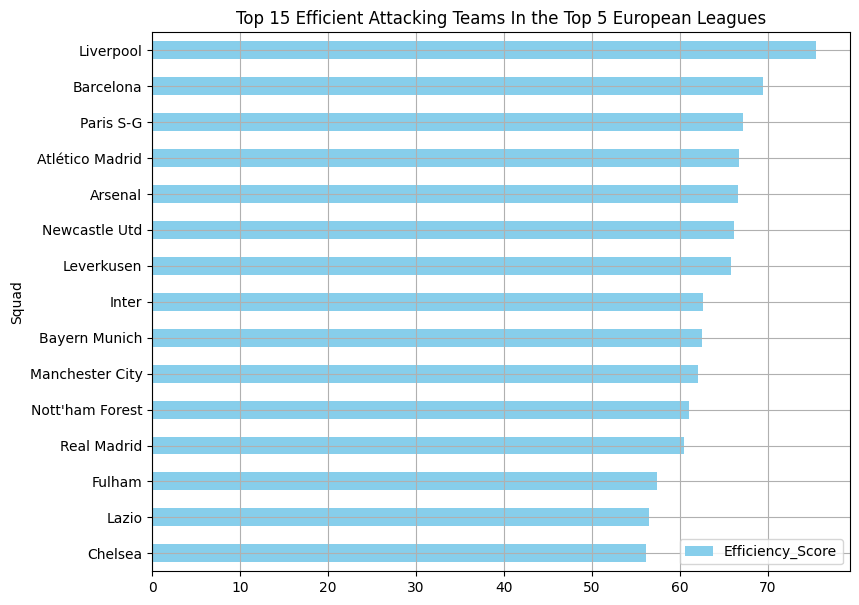

In [22]:
top_15_efficient_squads = squad_efficiency.head(15)[::-1]
top_15_efficient_squads.plot(kind="barh", x="Squad", y="Efficiency_Score", color="skyblue", grid=True, figsize=(9, 7))
plt.title("Top 15 Efficient Attacking Teams In the Top 5 European Leagues")
plt.legend(loc="lower right")
plt.show()

## xG vs Actual Goals: Players

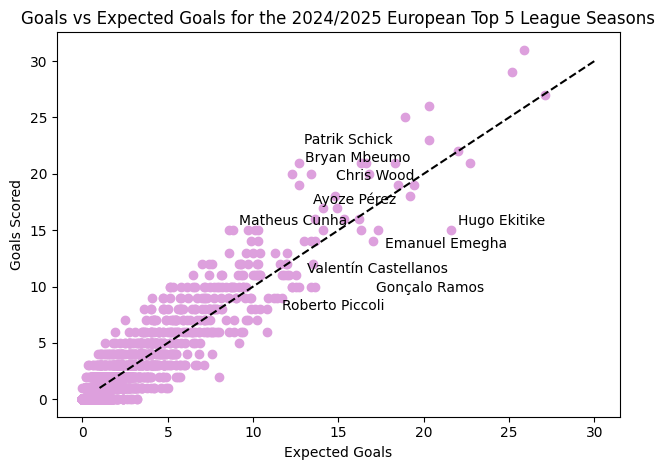

In [23]:
from adjustText import adjust_text

plt.scatter(x="xG", y="Gls", data=df, c="plum")
plt.plot([1, 30], [1, 30], color='black', linestyle='--')
plt.title("Goals vs Expected Goals for the 2024/2025 European Top 5 League Seasons") 
plt.ylabel("Goals Scored")
plt.xlabel("Expected Goals")

players_with_more_than_10_goals = df[df["Gls"] >= 10].copy()
players_with_more_than_10_goals['diff'] = players_with_more_than_10_goals['Gls'] - players_with_more_than_10_goals['xG']
overperformers = players_with_more_than_10_goals.nlargest(5, 'diff')
underperformers = players_with_more_than_10_goals.nsmallest(5, 'diff')

texts = []
for i in range(len(overperformers)):
    texts.append(plt.text(overperformers.iloc[i]['xG'], overperformers.iloc[i]['Gls'], overperformers.iloc[i]['Player']))
    texts.append(plt.text(underperformers.iloc[i]['xG'], underperformers.iloc[i]['Gls'], underperformers.iloc[i]['Player']))
    
adjust_text(texts)
plt.tight_layout()
plt.show()

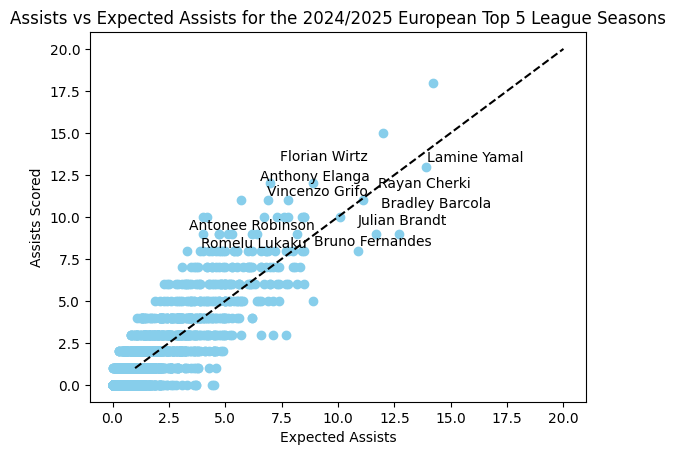

In [24]:
from adjustText import adjust_text
plt.scatter(x="xAG", y="Ast", data=df, c="skyblue")
plt.plot([1, 20], [1, 20], color='black', linestyle='--')
plt.title("Assists vs Expected Assists for the 2024/2025 European Top 5 League Seasons") 
plt.ylabel("Assists Scored")
plt.xlabel("Expected Assists")

players_with_more_than_10_assists = df[df["Ast"] >= 10].copy()
players_with_more_than_10_assists['diff'] = players_with_more_than_10_assists['Ast'] - players_with_more_than_10_assists['xAG']
overperformers = players_with_more_than_10_assists.nlargest(5, 'diff')
underperformers = players_with_more_than_10_assists.nsmallest(5, 'diff')

texts = []
for i in range(len(overperformers)):
    texts.append(plt.text(overperformers.iloc[i]['xAG'], overperformers.iloc[i]['Ast'], overperformers.iloc[i]['Player']))
    texts.append(plt.text(underperformers.iloc[i]['xAG'], underperformers.iloc[i]['Ast'], underperformers.iloc[i]['Player']))
    
adjust_text(texts)
plt.show()

## Data Cleaning for ML Models

In [25]:
X = df[['Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY','CrdR',
        'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR']]

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_scaled)

In [28]:
loadings = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
metrics = X.columns

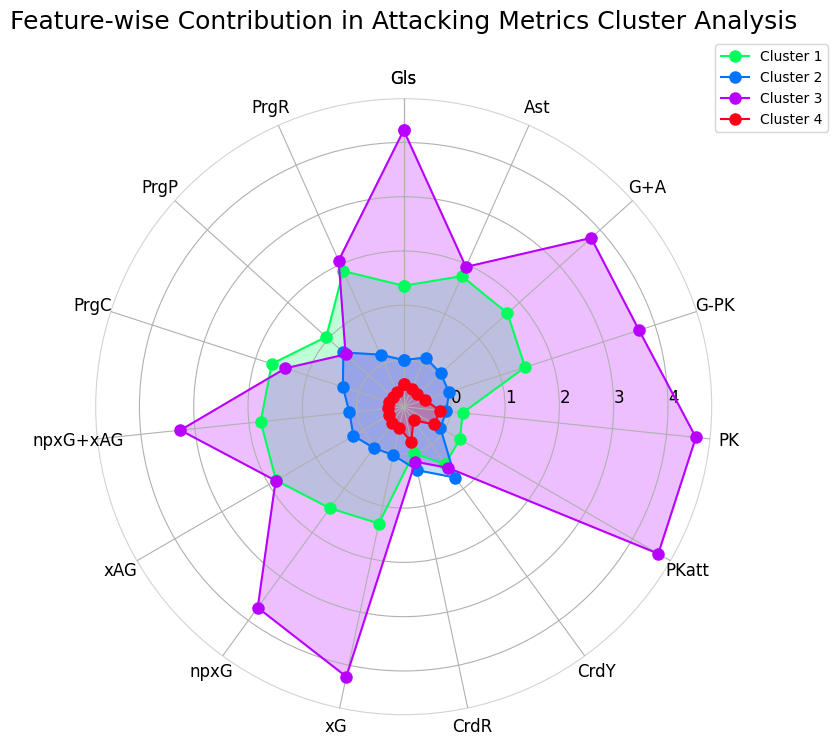

In [29]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})


N = len(metrics)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
angles = np.concatenate([angles, [angles[0]]])  

ax.set_title("Feature-wise Contribution in Attacking Metrics Cluster Analysis", y=1.1, fontsize=18)
ax.set_theta_zero_location("N")
ax.set_rlabel_position(90)
ax.set_theta_direction(-1)
ax.spines['polar'].set_zorder(1)
ax.spines['polar'].set_color('lightgrey')

color_palette = colormap.hsv(np.linspace(0.4, 1, len(loadings)))

for idx, (_, row) in enumerate(loadings.iterrows()):
    
    values = row[metrics].values.flatten().tolist()
    values += [values[0]]  
    
    ax.plot(angles, values, linewidth=1.50, linestyle='solid',
            label=f"Cluster {idx+1}", marker='o', markersize=8,
            color=color_palette[idx % len(color_palette)])
    
    ax.fill(angles, values, alpha=0.25, color=color_palette[idx % len(color_palette)])


plt.yticks(color="black", size=12)
plt.xticks(angles, metrics.tolist() + [metrics[0]], color='black', size=12)

plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
plt.show()

In [62]:
from sklearn.metrics import pairwise_distances
import numpy as np

centroids = kmeans.cluster_centers_
distances = pairwise_distances(X_scaled, centroids)  # (2283, 4)

# DF: Player name, Cluster, Distance from cluster
clustered = pd.DataFrame({
    "Player": df.loc[X.index, "Player"],
    "Cluster": labels,
})

clustered["Dist_To_Centroid"] = [distances[i, c] for i, c in enumerate(clustered["Cluster"])]

closest = clustered.groupby("Cluster")
closest = closest.apply(lambda df: df.nsmallest(5, "Dist_To_Centroid"), include_groups=False)
closest

Player  Dist_To_Centroid
Cluster                                              
0       2513      Gabriel Strefezza          1.641547
        1367          Ansgar Knauff          1.682303
        1854       Sebastian Nanasi          1.845045
        1112             Robin Hack          1.862480
        2480           Matìas Soulé          1.895707
1       2483            Djibril Sow          1.013717
        912             Seko Fofana          1.067163
        340    Leonardo Bittencourt          1.081663
        756            Matt Doherty          1.090327
        2054          Martín Payero          1.096115
2       103          Julián Álvarez          2.049932
        1991      Riccardo Orsolini          2.452299
        1259           Raúl Jiménez          2.825781
        1410        Andrej Kramarić          3.228770
        1417        Nikola Krstović          3.241664
3       2237        James Rodríguez          0.269697
        1776         Florent Mollet          0.279802
        1428  Moritz-Broni Kwarteng          0.284956
        1295           Mohamed Kaba          0.316101
        1748           James Milner          0.322649

Surprisingly, the players closest to each cluster centroid aren't particularly household names — I could only identify less than ten names out of fifteen, and I spend more time watching football than anything else.

This highlights an important point: in high-dimensional space, the idea of being "closest to the centroid" can be misleading to our human common sense of judgement. This is a classic case of **the curse of dimensionality**, where distances become less intuitive with more features.

Just because a player is mathematically near the center of a cluster doesn’t mean they reflect what we’d consider a “typical” player of that group — at least not according to what we football fans often call **the eye test**. In football, and other sports, the eye test is a way to judge an athlete as they compete within their sport based upon your own observations.

Our data is non negative. And we can reduce dimensions.

## NMF Recommendation

In [33]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_rescaled = scaler.fit_transform(X)

nmf = NMF(n_components=5)

nmf_features = nmf.fit_transform(X_rescaled)

In [51]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler, normalize
import pandas as pd
import numpy as np

norm_features = normalize(nmf_features)
idx = np.where(df["Player"] == "Nico Williams")[0][0]
target = norm_features[idx]
similarities = norm_features.dot(target)
similar_players = pd.Series(similarities, index=df["Player"])
similar_players.nlargest(10)

Player
Nico Williams                1.000000
Léo Scienza                  0.998830
Anthony Elanga               0.998213
Adrian Benedyczak            0.997926
Lamine Yamal                 0.996017
Nicolas Pays                 0.995153
Tariq Lamptey                0.994895
Silvère Ganvoula M'Boussy    0.994800
Farid El Melali              0.994119
Mathys Tel                   0.993605
dtype: float64

## Final Thoughts:

The **clustering task** doesn't offer much real-world value in its current form, since we're only using goal-related metrics. To properly classify players, you'd need **position-specific metrics** — a broader range of data tailored to roles on the pitch. For example, **crosses and dribbles** are more relevant for wingers, while **tackles, blocks, and clearances** matter more for defenders.

That said, I found the **recommendation system** more insightful. Even with limited features, it already shows promise — and it could become a powerful tool with a richer dataset.

In the future, I plan to use a more comprehensive dataset that includes **technical, physical, and tactical attributes**. That would allow deeper analysis and better understanding of players' profiles.

Ultimately, the clustering part of this project could become especially useful for **younger players who don’t have fixed positions yet**, or for identifying **misprofiled players**. Meanwhile, recommendation systems like this can help with **player comparisons, recruitment, and transfer decisions**, offering a data-driven way to support scouting and team building.

As for the EDA section, I found it very insightful, especially on exploring team-wise attacking efficiency and expected versus actual metrics.